In [1]:
import matplotlib.pyplot as plt
import numpy as np

data_x =[12.46, 0.25, 5.22, 11.3, 6.81, 4.59, 0.66, 14.53, 15.49, 14.43,
         2.19, 1.35, 10.02, 12.93, 5.93, 2.92, 12.81, 4.88, 13.11, 5.8]
data_y =[29.01, 4.7, 22.33, 24.99, 18.85, 14.89, 10.58, 36.84, 42.36, 39.73,
         11.92, 7.45, 22.9, 36.62, 16.04, 16.56, 31.55, 20.04, 35.26, 23.59]

#### A scatter plot and predicted line plot (if any) function 

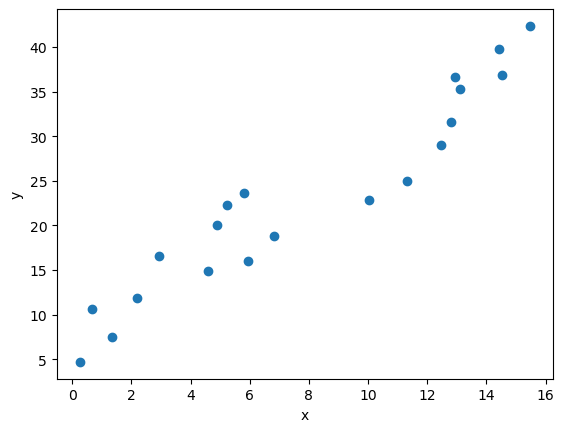

In [2]:
def plot_data_and_prediction(x, y, w=None):
    plt.scatter(x, y, label='Data scatters')
    if w is not None:
        intercept = w[0]
        slope = w[1:]
        predictions = np.array(x).reshape(-1, len(w) - 1) @ slope + intercept
        plt.plot(x, predictions, color='red', label='prediction')
        
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
plot_data_and_prediction(data_x, data_y)

## 1. Closed-form Solution

In [3]:
x_0 = np.ones((len(data_x), 1))             # m * 1 matrix, x_0 = 1
x = np.array(data_x).reshape(-1, 1)         # m * 1 matrix
x = np.concatenate((x_0, x), axis=1)   # get X in shape [m, 2]
y = np.array(data_y).reshape(-1 ,1)         # get Y in shape [m, 1]
print(x)
print(y)

[[ 1.   12.46]
 [ 1.    0.25]
 [ 1.    5.22]
 [ 1.   11.3 ]
 [ 1.    6.81]
 [ 1.    4.59]
 [ 1.    0.66]
 [ 1.   14.53]
 [ 1.   15.49]
 [ 1.   14.43]
 [ 1.    2.19]
 [ 1.    1.35]
 [ 1.   10.02]
 [ 1.   12.93]
 [ 1.    5.93]
 [ 1.    2.92]
 [ 1.   12.81]
 [ 1.    4.88]
 [ 1.   13.11]
 [ 1.    5.8 ]]
[[29.01]
 [ 4.7 ]
 [22.33]
 [24.99]
 [18.85]
 [14.89]
 [10.58]
 [36.84]
 [42.36]
 [39.73]
 [11.92]
 [ 7.45]
 [22.9 ]
 [36.62]
 [16.04]
 [16.56]
 [31.55]
 [20.04]
 [35.26]
 [23.59]]


Use formula $w = \left(X^T X\right)^{-1} X^T y$ to calcualte the closed-form solution.

In [4]:
# use formula to calcualte
w = np.linalg.inv(x.T @ x) @ x.T @ y
w

array([[7.12336627],
       [2.05316257]])

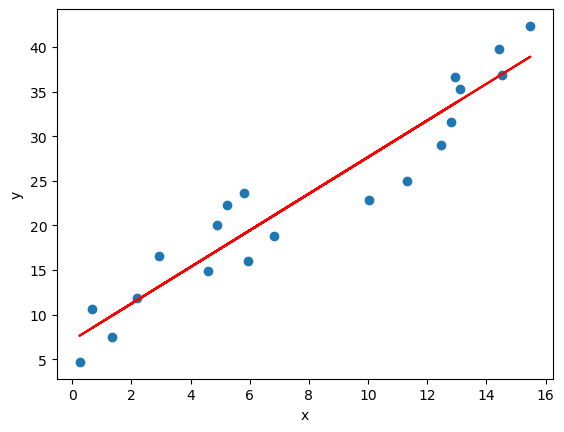

In [5]:
plot_data_and_prediction(data_x, data_y, w)

## 2. Gradient Descent

In [6]:
def get_loss(x, y, w):
    loss = 0
    num_data = len(data_x)
    for i in range(len(y)):
        loss += (x @ w - y).T @ (x @ w - y)
    return loss / num_data


def gradient_descent(x, y, learning_rate=0.01, epochs=1000):
    w = np.array([[1], [10]])
    n = len(x)
    
    for i in range(1, epochs + 1):
        num_data = len(data_x)
        gradient = 2 / num_data * x.T @ (x @ w - y)
        loss = get_loss(x, y, w).item()
        print(f'[Epoch {i}] Loss = {loss:.4f}')
        loss_record.append(loss)
        
        w = w - learning_rate * gradient
        
    return w

loss_record = []
w = gradient_descent(x, y)

[Epoch 1] Loss = 96038.8425
[Epoch 2] Loss = 56101.9659
[Epoch 3] Loss = 32850.6876
[Epoch 4] Loss = 19313.2735
[Epoch 5] Loss = 11430.9910
[Epoch 6] Loss = 6840.9688
[Epoch 7] Loss = 4167.6145
[Epoch 8] Loss = 2610.0997
[Epoch 9] Loss = 1702.2063
[Epoch 10] Loss = 1172.5159
[Epoch 11] Loss = 863.0171
[Epoch 12] Loss = 681.7200
[Epoch 13] Loss = 575.0708
[Epoch 14] Loss = 511.8919
[Epoch 15] Loss = 474.0327
[Epoch 16] Loss = 450.9262
[Epoch 17] Loss = 436.4204
[Epoch 18] Loss = 426.9337
[Epoch 19] Loss = 420.3809
[Epoch 20] Loss = 415.5480
[Epoch 21] Loss = 411.7279
[Epoch 22] Loss = 408.5090
[Epoch 23] Loss = 405.6515
[Epoch 24] Loss = 403.0156
[Epoch 25] Loss = 400.5198
[Epoch 26] Loss = 398.1167
[Epoch 27] Loss = 395.7782
[Epoch 28] Loss = 393.4883
[Epoch 29] Loss = 391.2372
[Epoch 30] Loss = 389.0191
[Epoch 31] Loss = 386.8308
[Epoch 32] Loss = 384.6699
[Epoch 33] Loss = 382.5352
[Epoch 34] Loss = 380.4258
[Epoch 35] Loss = 378.3410
[Epoch 36] Loss = 376.2803
[Epoch 37] Loss = 374.

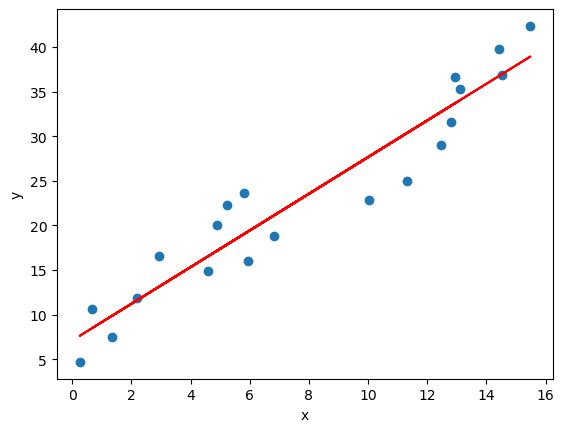

In [7]:
plot_data_and_prediction(data_x, data_y, w)

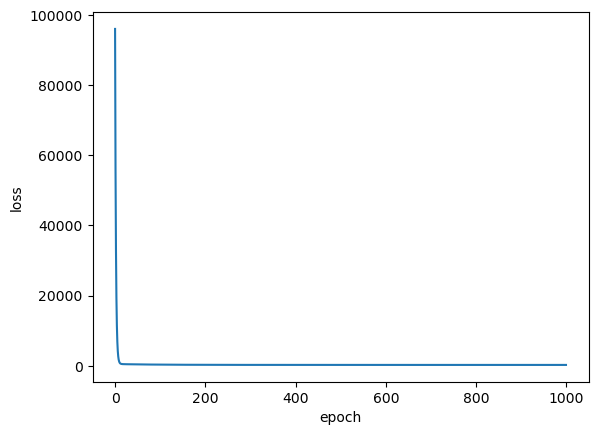

In [8]:
plt.plot(range(len(loss_record)), loss_record)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 3. Scikit-learn package

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(np.array(data_x).reshape(-1, 1), y)

slope = model.coef_[0]
intercept = model.intercept_

print(slope, intercept)

[2.05316257] [7.12336627]


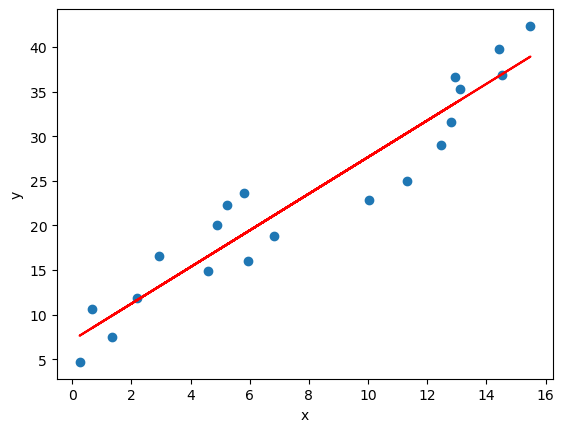

In [10]:
plot_data_and_prediction(data_x, data_y, np.array([intercept, slope]).reshape(-1))